# Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann

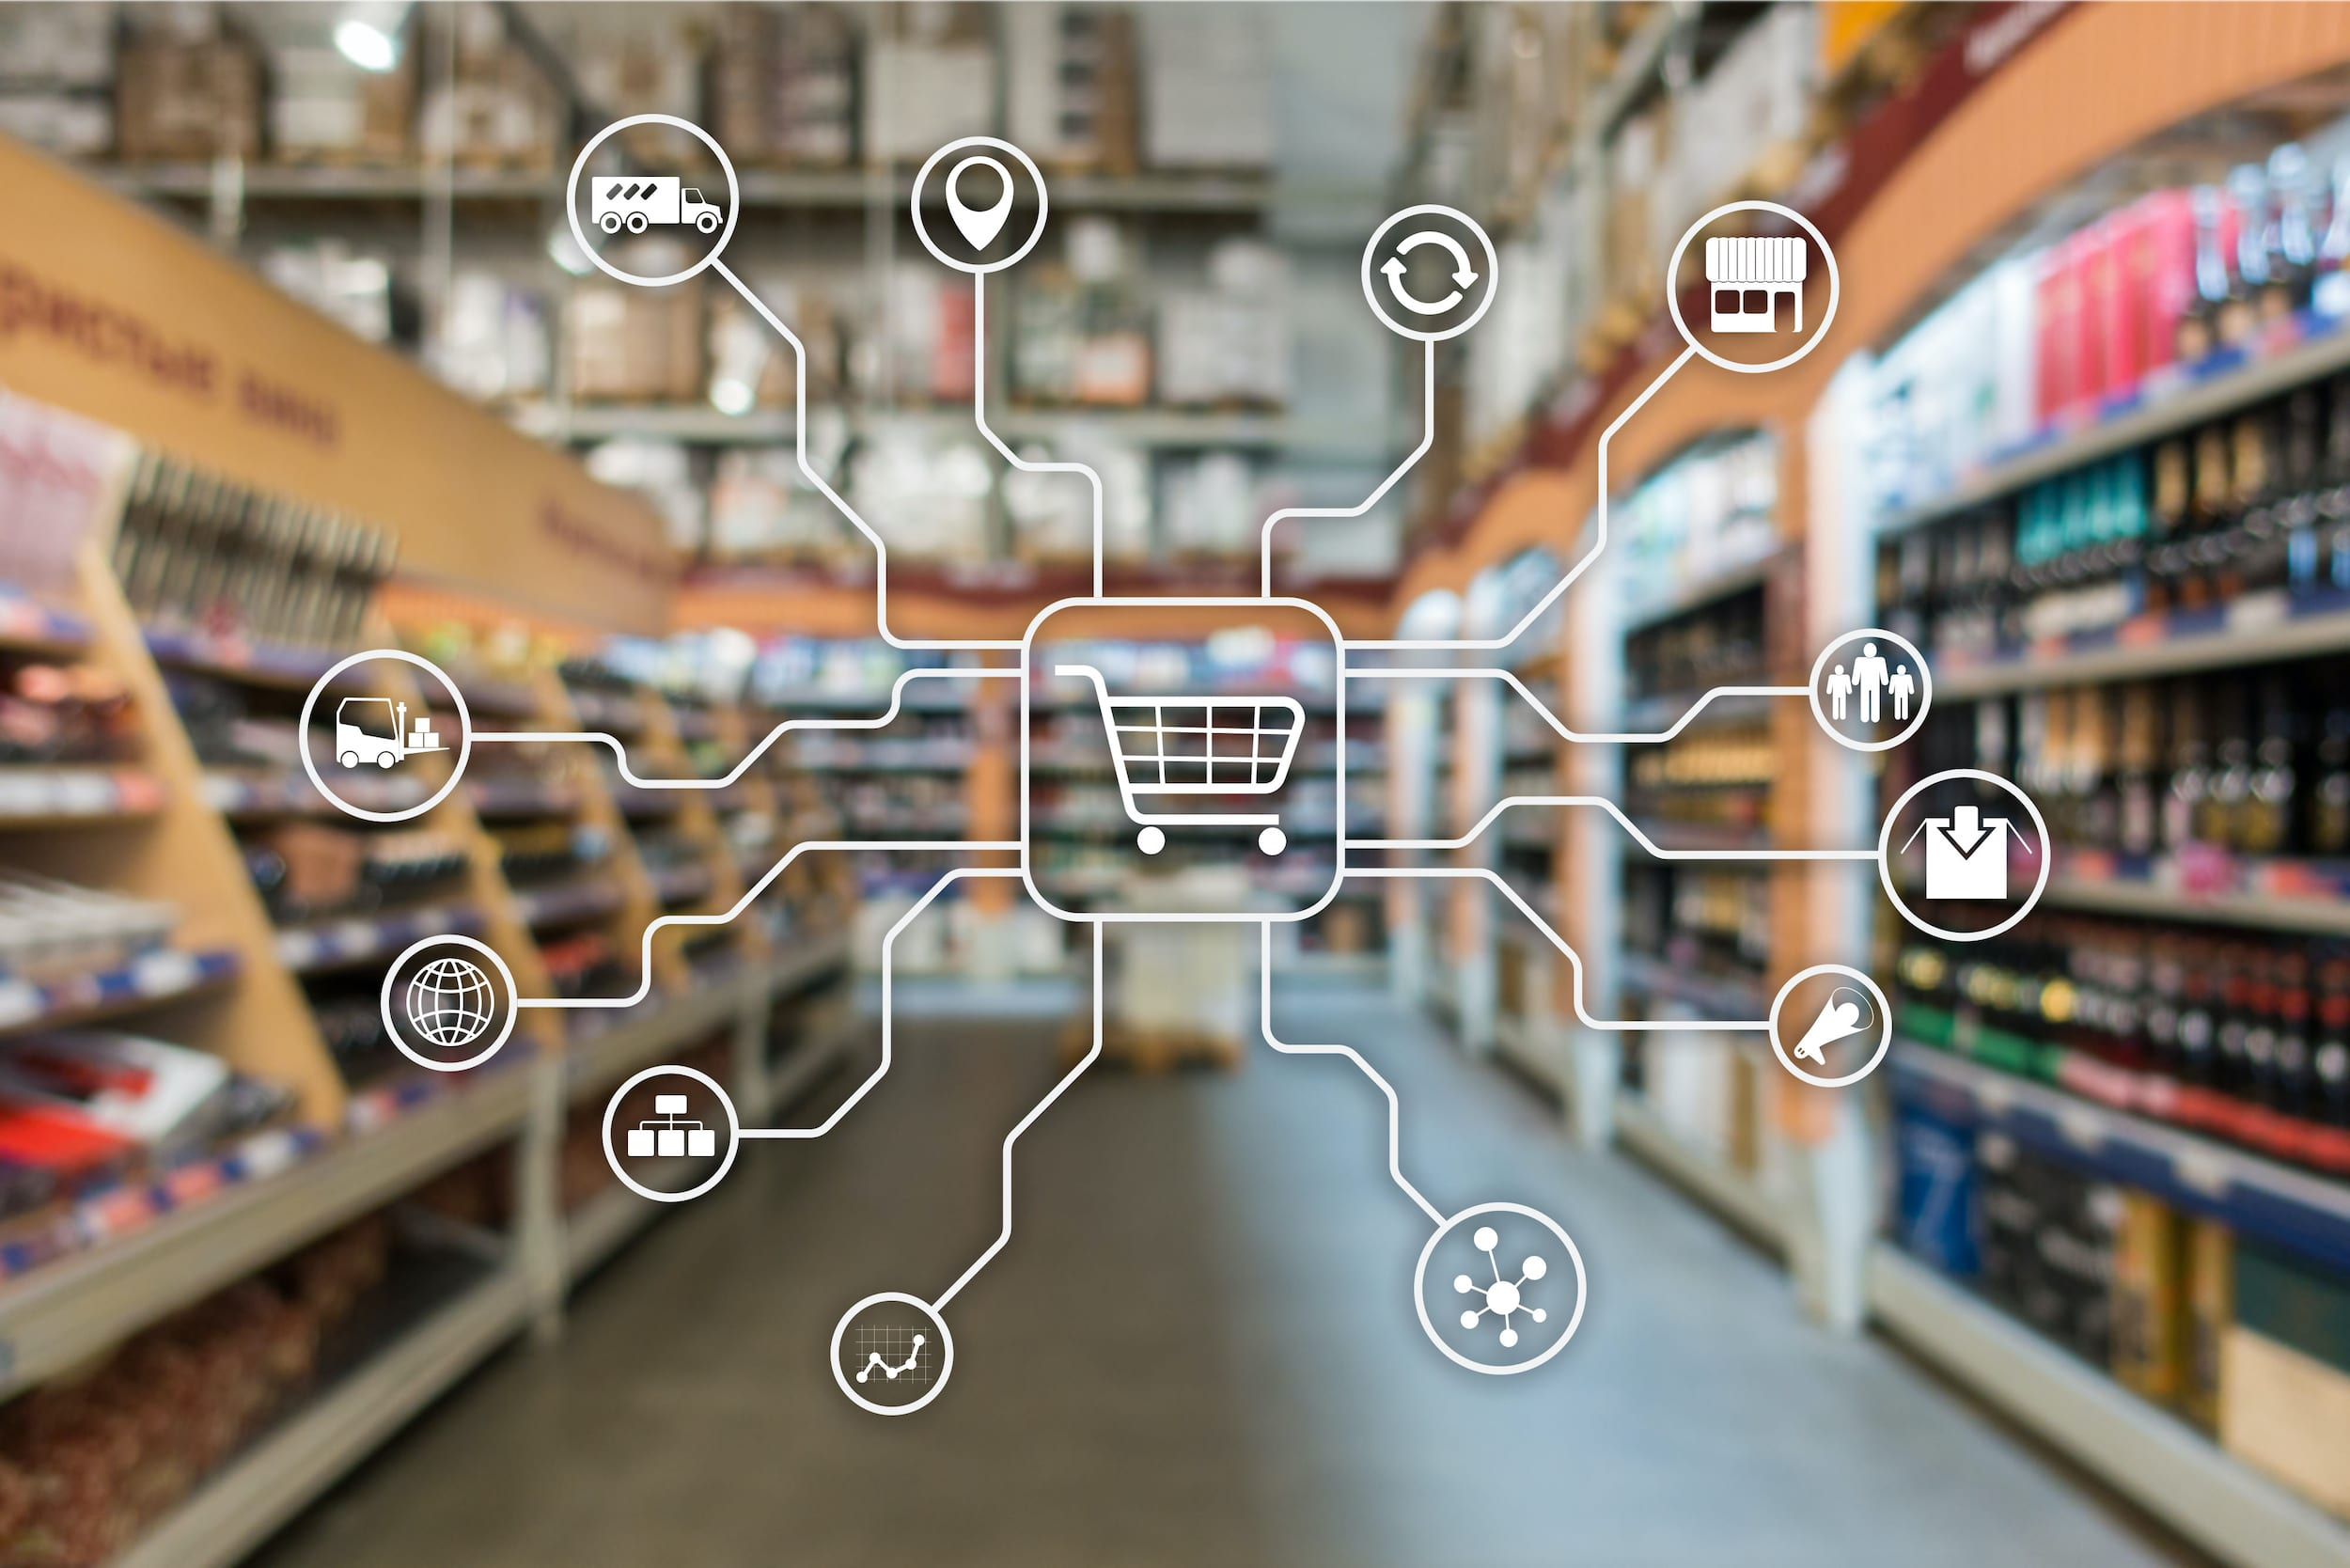

# **Problem Description**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

In [2]:
sales_data = pd.read_csv("/content/drive/MyDrive/Capstone Project 2/Copy of Rossmann Stores Data.csv")
stores_data = pd.read_csv("/content/drive/MyDrive/Capstone Project 2/Copy of store.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Shape of Sales Data
sales_data.shape

(1017209, 9)

In [4]:
# Shape of Store Data
stores_data.shape

(1115, 10)

In [5]:
# Overall descriptive summary of sales data.
sales_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
# Overall descriptive summary of store data.
stores_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [7]:
# Checking for datatypes and null values in sales data.
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
# Checking for datatypes and null values in stores data.
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [9]:
# Null values in Stores Data.
stores_data.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Out of 1115 entries there are missing values in the columns named: CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear, PromoInterval.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Competition Distance Distribution Plot')

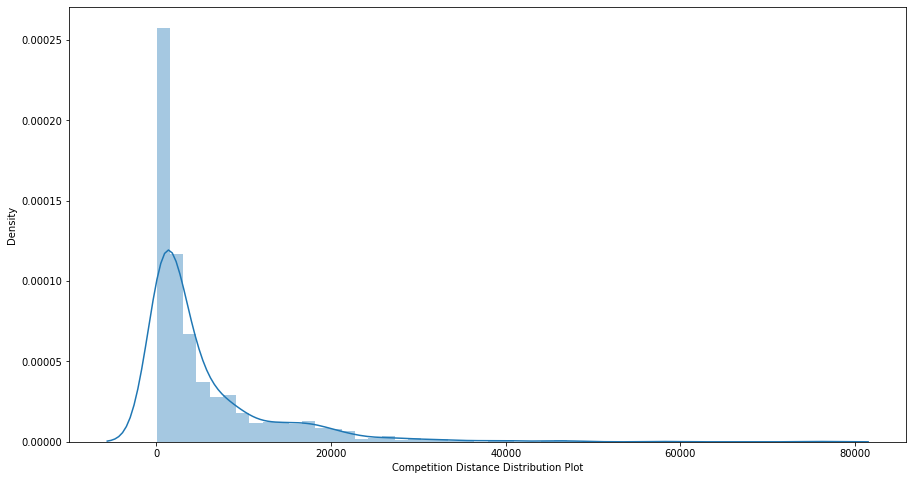

In [38]:
# Distribution of Store Competition Distance
plt.figure(figsize=(15, 8))
sns.distplot(x=stores_data['CompetitionDistance'], hist = True)
plt.xlabel('Competition Distance Distribution Plot')

The Distribution is right skewed, so we will replace missing values by using median.

In [11]:
# Filling competition dance columns with the median value.
stores_data['CompetitionDistance'].fillna(stores_data['CompetitionDistance'].median(), inplace= True)

In [12]:
# Filling Competition open since month and year with the most occuring values of the columns i.e modes of those columns.
stores_data['CompetitionOpenSinceMonth'].fillna(stores_data['CompetitionOpenSinceMonth'].mode()[0], inplace= True)
stores_data['CompetitionOpenSinceYear'].fillna(stores_data['CompetitionOpenSinceYear'].mode()[0], inplace= True)

In [13]:
# Imputing the nan values of promo2 related columns with 0
stores_data['Promo2SinceWeek'].fillna(value=0,inplace=True)
stores_data['Promo2SinceYear'].fillna(value=0,inplace=True)
stores_data['PromoInterval'].fillna(value=0,inplace=True)

In [14]:
# Check for null values
stores_data.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Merging the two datasets

In [15]:
merge_data = sales_data.merge(right=stores_data, on='Store',how='left')

In [16]:
# First look of merge data.
merge_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [17]:
# Shape of the merge dataframe
merge_data.shape

(1017209, 18)

In [18]:
# Converting the object type columns to Int type.
merge_data['StoreType'] = merge_data['StoreType'].map({'a': 1, 'b' : 2, 'c' : 3, 'd' : 4})
merge_data['Assortment'] = merge_data['Assortment'].map({'a': 1, 'b' : 2, 'c' : 3})

In [19]:
# Checking the datatypes
merge_data['PromoInterval'].value_counts()

0                   508031
Jan,Apr,Jul,Oct     293122
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: PromoInterval, dtype: int64

In [20]:
# Converting the object type columns to Int type.
merge_data['PromoInterval'] = merge_data['PromoInterval'].map({ 0: 0, 'Jan,Apr,Jul,Oct' : 1, 'Feb,May,Aug,Nov' : 2, 'Mar,Jun,Sept,Dec' : 3})

In [21]:
# Dropping the column name 'Date' & 'StateHoliday'.
merge_data.drop(['Date', 'StateHoliday'],axis=1, inplace=True)

In [22]:
# Checking the merge datatypes.
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 16 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   SchoolHoliday              1017209 non-null  int64  
 7   StoreType                  1017209 non-null  int64  
 8   Assortment                 1017209 non-null  int64  
 9   CompetitionDistance        1017209 non-null  float64
 10  CompetitionOpenSinceMonth  1017209 non-null  float64
 11  CompetitionOpenSinceYear   1017209 non-null  float64
 12  Promo2                     1017209 non-null  int64  
 13  Promo2SinceW

In [23]:
# Checking for the merge data columns
merge_data.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

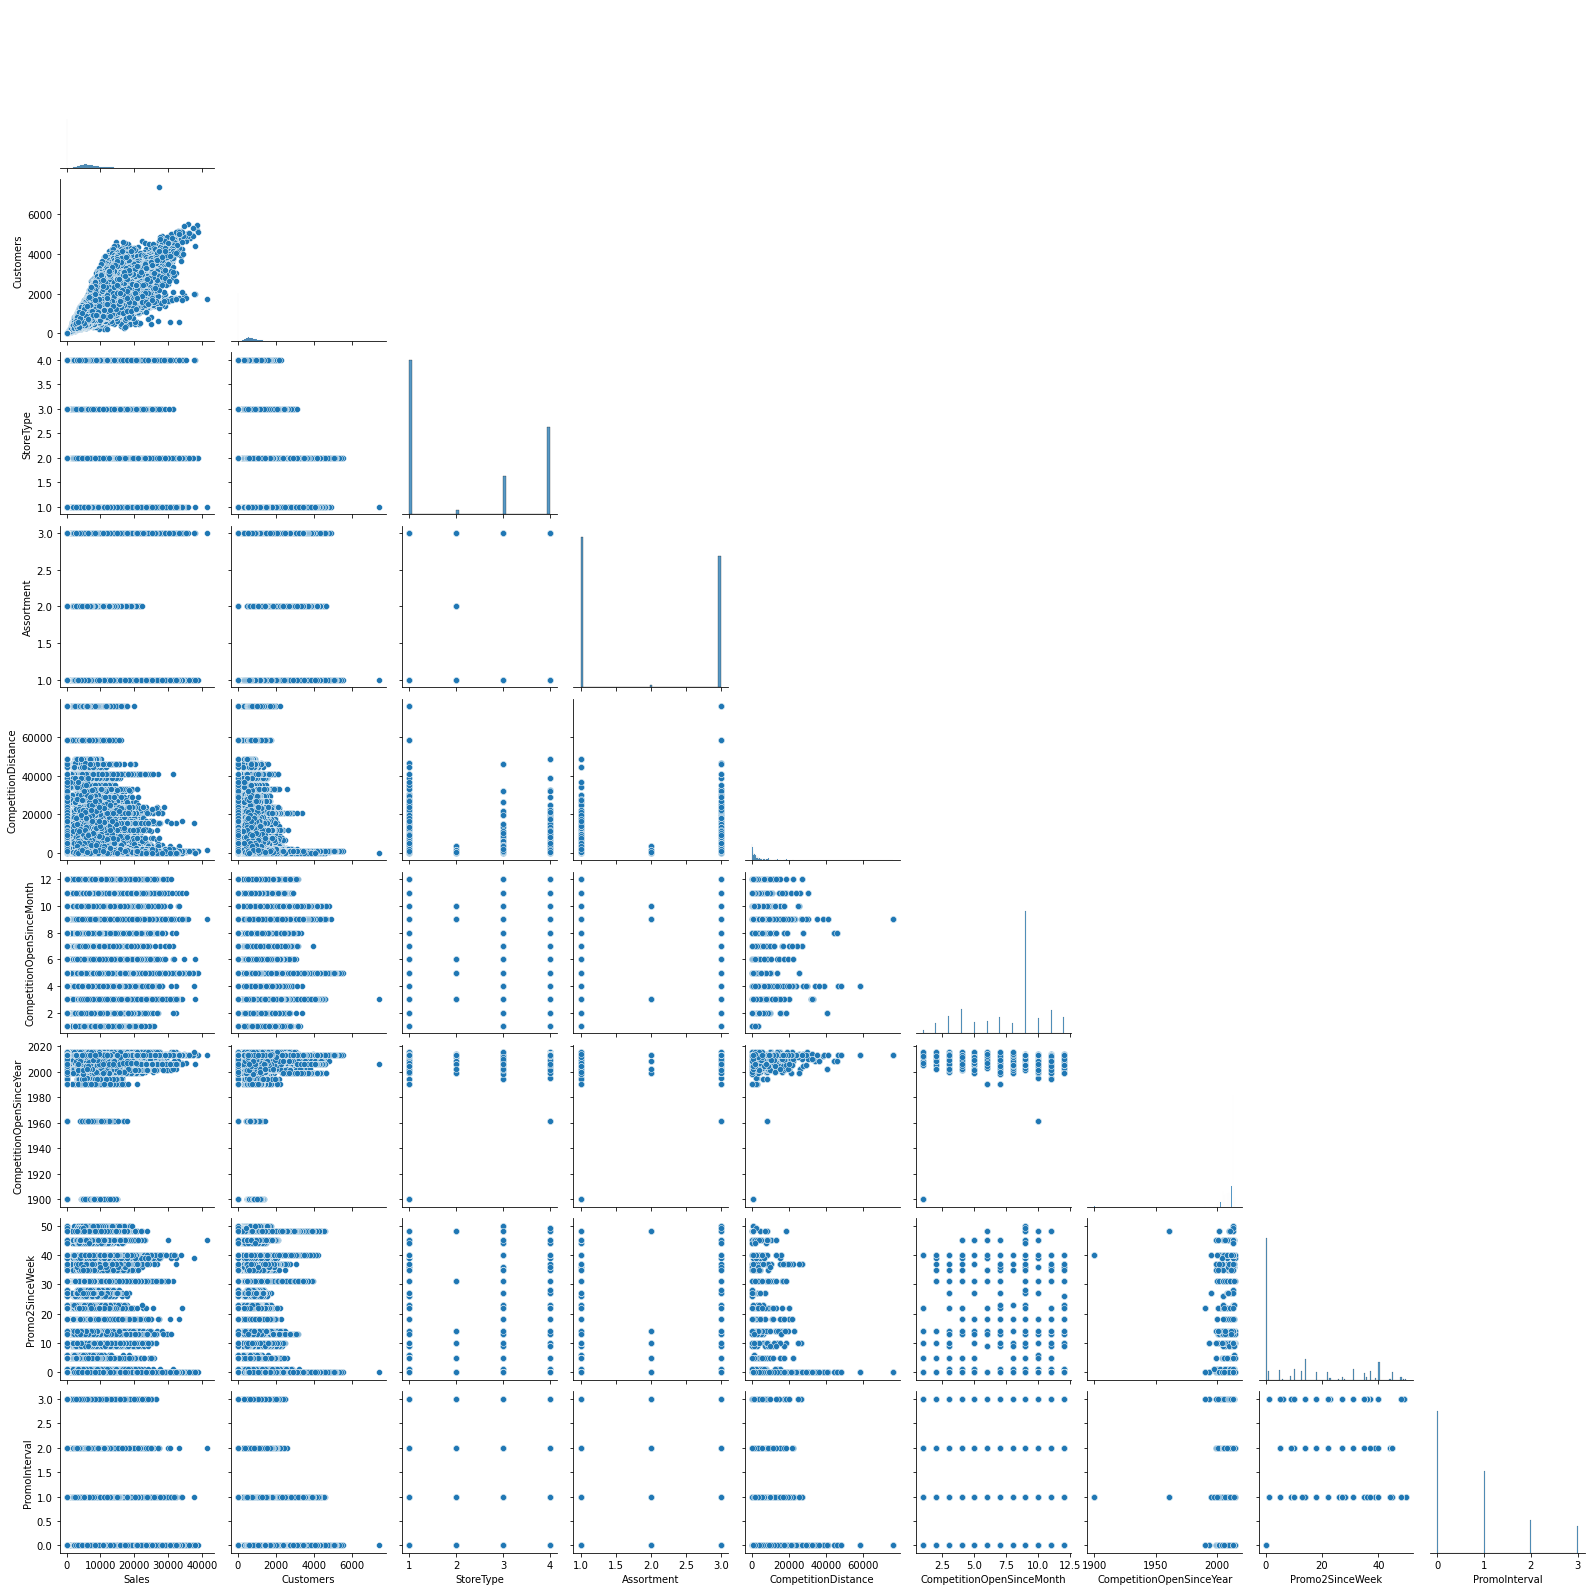

In [24]:
# Pairplot for the following columns.
sns.pairplot(merge_data[['Sales', 'Customers', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'PromoInterval']],corner=True)

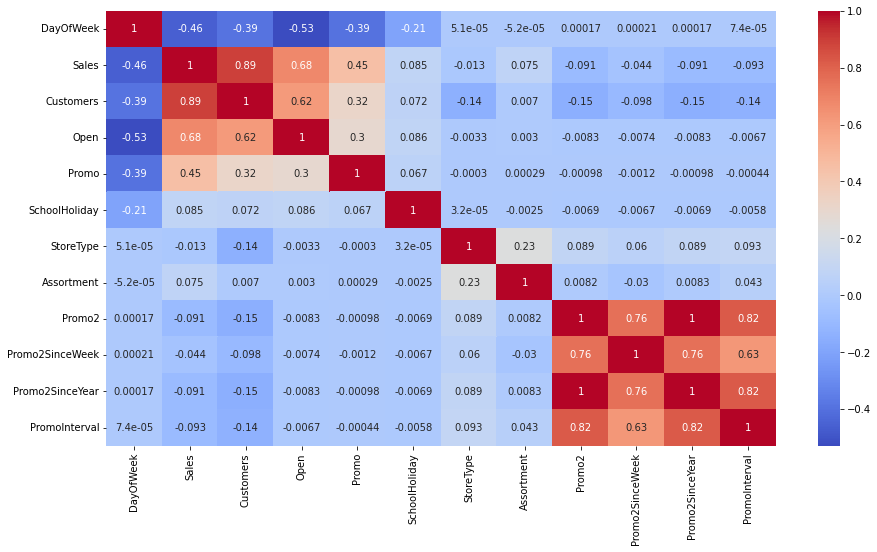

In [25]:
# Heatmap of merge dataset to check coorelation
plt.figure(figsize=(15, 8))
df_corr = merge_data[['DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
'SchoolHoliday', 'StoreType', 'Assortment', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']].corr()
sns.heatmap(df_corr,annot=True,cmap='coolwarm')


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


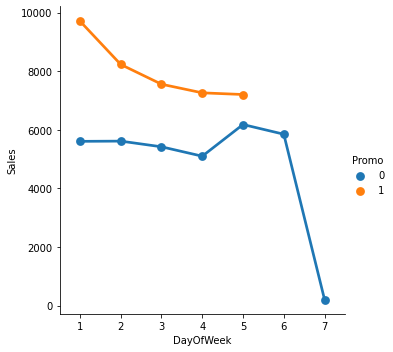

In [26]:
# As We can see that when the promo is running Sales are high.
sns.factorplot(data = merge_data, x = "DayOfWeek", y = "Sales", hue = "Promo")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


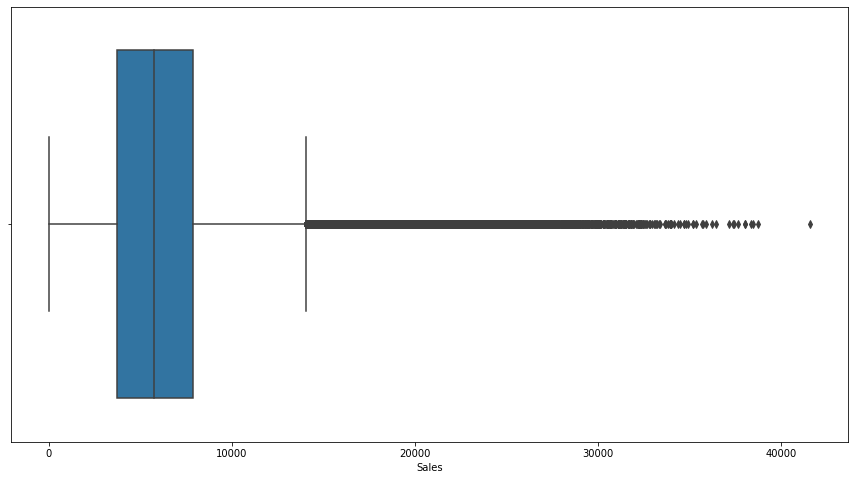

In [27]:
#Checking outliers in sales
plt.figure(figsize=(15,8))
sns.boxplot(sales_data['Sales'])

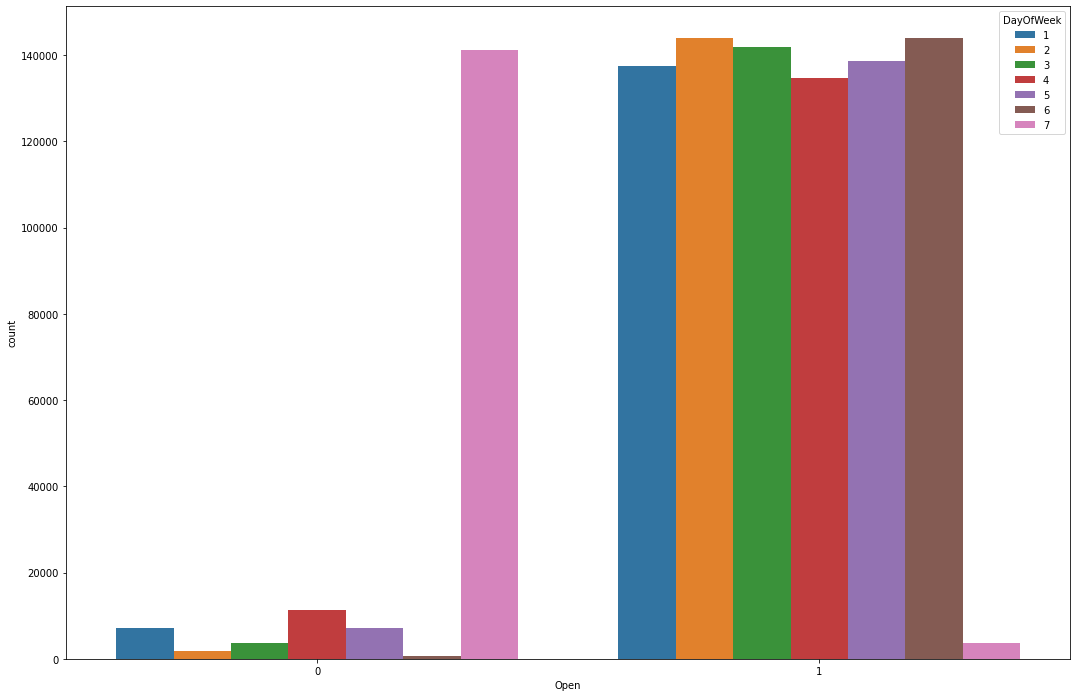

In [29]:
# This chart shows counts of stores closed for refurbishment and suggests that most stores are closed on sunday
plt.figure(figsize=(18,12))
sns.countplot(x=merge_data["Open"], hue=merge_data["DayOfWeek"])

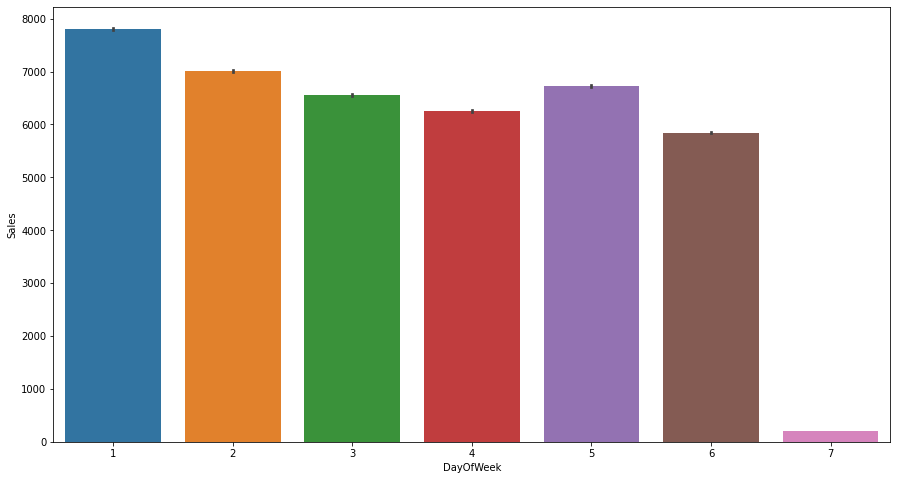

In [30]:
#Plot for sales in terms of days of the week
plt.figure(figsize=(15,8))
sns.barplot(x='DayOfWeek', y='Sales' ,data=merge_data)

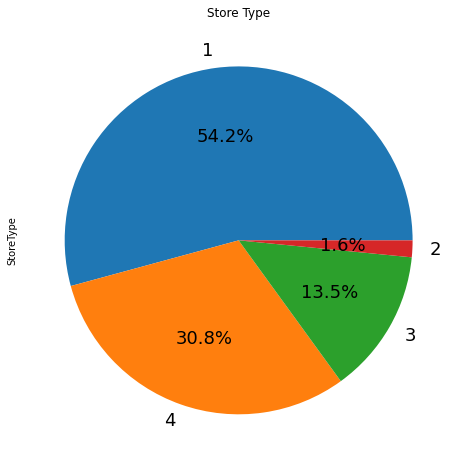

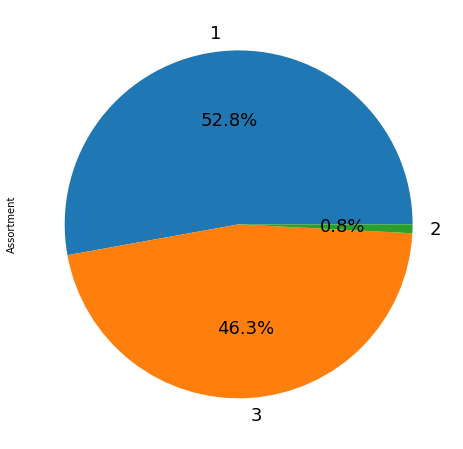

In [37]:
# Percentage share of Store Type & Assortment.
percent = merge_data["StoreType"].value_counts()
percent.plot.pie(fontsize= 18,autopct="%.1f%%",figsize=(10,8),textprops={'fontsize': 20})
plt.title('Store Type')
plt.show()

percent = merge_data["Assortment"].value_counts()
percent.plot.pie(fontsize= 18,autopct="%.1f%%",figsize=(10,8),textprops={'fontsize': 20})
plt.show()

Text(0.5, 1.0, 'Plot between Competition Open Since Month and Sales')

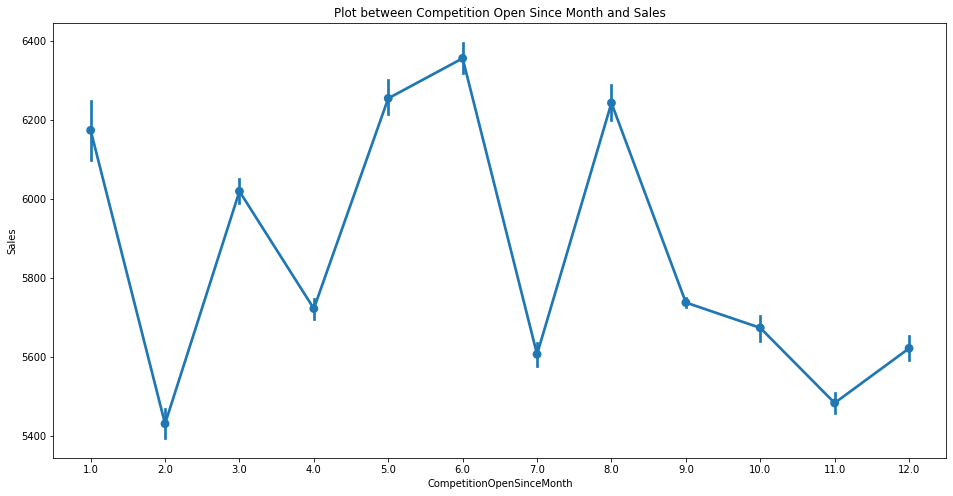

In [39]:
# Plot between compeitition open since month and sales.
plt.figure(figsize=(16,8))
sns.pointplot(x= 'CompetitionOpenSinceMonth', y='Sales', data=merge_data)
plt.title('Plot between Competition Open Since Month and Sales')